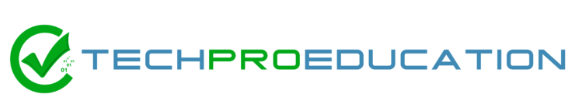

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("kc_house_data.csv")

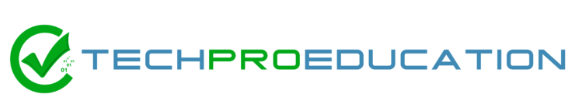

## Exploratory Data Analysis and Visualization

"kc_house_data" veri seti, 2014 yılında Seattle, Washington'da gerçekleşen ev satışları hakkındaki verileri içermektedir. Veri setinin tam olarak ne zaman toplandığı belirtilmemektedir, ancak veri setinin açıklamasında, ev satışlarının 2014 yılı Mayıs ve 2015 yılı Mayıs arasında gerçekleştiği belirtilmektedir.

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.isnull().sum().any()

False

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.000,4580474287.771,2876735715.748,1000102.000,2123049175.000,3904930410.000,7308900490.000,9900000190.000
price,21597.000,540296.574,367368.140,78000.000,322000.000,450000.000,645000.000,7700000.000
bedrooms,21597.000,3.373,0.926,1.000,3.000,3.000,4.000,33.000
bathrooms,21597.000,2.116,0.769,0.500,1.750,2.250,2.500,8.000
sqft_living,21597.000,2080.322,918.106,370.000,1430.000,1910.000,2550.000,13540.000
sqft_lot,21597.000,15099.409,41412.637,520.000,5040.000,7618.000,10685.000,1651359.000
floors,21597.000,1.494,0.540,1.000,1.000,1.500,2.000,3.500
waterfront,21597.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000
view,21597.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000
condition,21597.000,3.410,0.651,1.000,3.000,3.000,4.000,5.000


### İd_number

In [7]:
df = df.drop('id', axis = 1)

### price

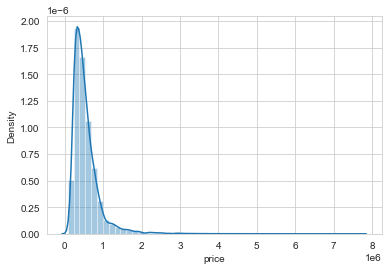

In [8]:
sns.distplot(df['price']);

In [9]:
df[df["price"] > 3000000].sort_values(by="price", ascending=False)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,10/13/2014,7700000.000,6,8.000,12050,27600,2.500,0,3,4,13,8570,3480,1910,1987,98102,47.630,-122.323,3940,8800
3910,6/11/2014,7060000.000,5,4.500,10040,37325,2.000,1,2,3,11,7680,2360,1940,2001,98004,47.650,-122.214,3930,25449
9245,9/19/2014,6890000.000,6,7.750,9890,31374,2.000,0,4,3,13,8860,1030,2001,0,98039,47.630,-122.240,4540,42730
4407,8/4/2014,5570000.000,5,5.750,9200,35069,2.000,0,0,3,13,6200,3000,2001,0,98039,47.629,-122.233,3560,24345
1446,4/13/2015,5350000.000,5,5.000,8000,23985,2.000,0,4,3,12,6720,1280,2009,0,98004,47.623,-122.220,4600,21750
1313,4/13/2015,5300000.000,6,6.000,7390,24829,2.000,1,4,4,12,5000,2390,1991,0,98040,47.563,-122.210,4320,24619
1162,10/20/2014,5110000.000,5,5.250,8010,45517,2.000,1,4,3,12,5990,2020,1999,0,98033,47.677,-122.211,3430,26788
8085,6/17/2014,4670000.000,5,6.750,9640,13068,1.000,1,4,3,12,4820,4820,1983,2009,98040,47.557,-122.210,3270,10454
2624,8/15/2014,4500000.000,5,5.500,6640,40014,2.000,1,4,3,12,6350,290,2004,0,98155,47.749,-122.280,3030,23408
8629,6/18/2014,4490000.000,4,3.000,6430,27517,2.000,0,0,3,12,6430,0,2001,0,98004,47.621,-122.219,3720,14592


Bu kod parçası, bir "df" adlı veri çerçevesinin içindeki sütunlar arasındaki korelasyonları incelemek ve "price" (fiyat) sütununun diğer sütunlarla olan ilişkisini görselleştirmek için kullanılıyor.

Kodun işleyişini açıklayacak olursak:

plt.figure(figsize=(8, 10)): Grafiğin boyutunu (genişlik, yükseklik) olarak belirliyoruz.
df.corr()["price"].sort_values().drop("price"): "price" sütunu ile diğer sütunlar arasındaki korelasyonları hesaplayarak, "price" sütununun diğer sütunlarla ilişkisini gösteren bir Seri (Series) nesnesi oluşturuyoruz. Ardından bu Seri nesnesini korelasyon değerlerine göre sıralıyoruz ve "price" sütununu çıkartıyoruz.
.plot(kind="barh"): Bu sıralanmış korelasyon değerlerini yatay bar grafiği şeklinde görselleştiriyoruz.
Sonuç olarak, grafiğin sol tarafında düşük korelasyonlu sütunlar ve sağ tarafında yüksek korelasyonlu sütunlar bulunacak. Grafiği inceleyerek, "price" sütununun diğer sütunlarla nasıl bir ilişki içerisinde olduğunu ve hangi sütunların daha güçlü bir korelasyon gösterdiğini gözlemleyebilirsiniz.

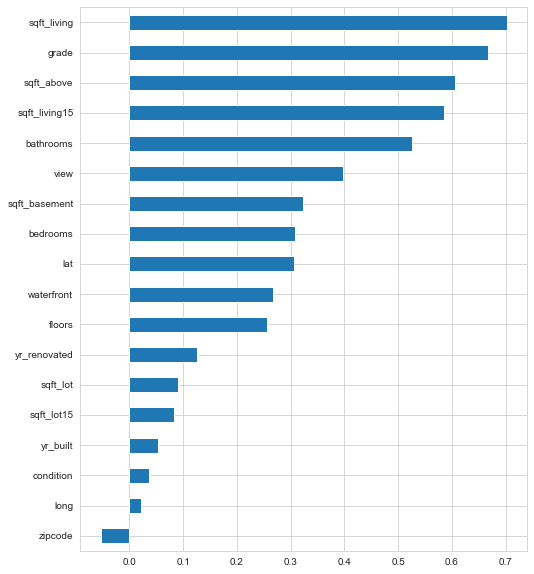

In [10]:
plt.figure(figsize = (8,10))
df.corr()["price"].sort_values().drop("price").plot(kind = "barh");

### bedrooms

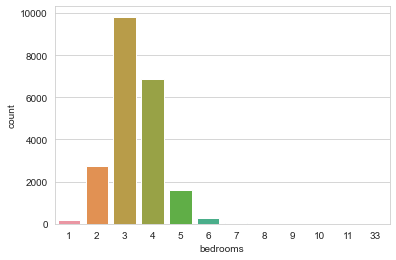

In [11]:
sns.countplot(df['bedrooms']);

Bu grafiği kullanarak veri çerçevesindeki "bedrooms" (yatak odası sayısı) sütununun "price" (fiyat) sütunu ile ilişkisini görselleştirmek amaçlanıyor.

Kodun işleyişini açıklayacak olursak:

sns.boxplot(x='bedrooms', y='price', data=df): Veri çerçevesindeki "bedrooms" sütununu x eksenine yerleştiriyoruz ve "price" sütununu y eksenine yerleştiriyoruz. "data" parametresi ile hangi veri çerçevesinin kullanılacağını belirtiyoruz.
Bu grafiğin sonucunda, her bir yatak odası sayısı için fiyatın dağılımını gösteren kutu grafiği elde edilir. Bu grafiği inceleyerek, yatak odası sayısına göre fiyatların nasıl dağıldığını ve olası aykırı değerleri belirlemek için kullanabilirsiniz.

In [12]:
df[df["bedrooms"] > 10]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,8/21/2014,520000.000,11,3.000,3000,4960,2.000,0,0,3,7,2400,600,1918,1999,98106,47.556,-122.363,1420,4960
15856,6/25/2014,640000.000,33,1.750,1620,6000,1.000,0,0,5,7,1040,580,1947,0,98103,47.688,-122.331,1330,4700


In [13]:
df = df[df["bedrooms"] != 33]

df[df["bedrooms"] != 33]: Bu koşulu veri çerçevesine uygulayarak, "bedrooms" sütununda değeri 33 olan satırları içermeyen yeni bir veri çerçevesi oluşturuluyor.
Sonuç olarak, bu kod satırı, yatak odası sayısı değeri 33 olan satırları içermeyen bir veri çerçevesi elde etmenizi sağlar. Böylece analizinizi daha tutarlı ve gerçekçi bir şekilde yapabilirsiniz.

Most likely the data was entered incorrectly.

In [14]:
df.shape

(21596, 20)

### date

In [15]:
df['date'].dtype

dtype('O')

In [16]:
df['date'] = pd.to_datetime(df['date'])

Bu kod satırı, "date" sütunundaki tarih verilerini pandas kütüphanesinin pd.to_datetime() işlevini kullanarak datetime veri türüne dönüştürmek için kullanılıyor. Tarih verileri genellikle metin veya sayısal veri türleri olarak saklanırken, datetime veri türü tarih ve saat bilgilerini daha etkili bir şekilde temsil etmek için kullanılır.

Bu kodun kullanım amacı şu şekildedir:

df['date']: Bu ifade, "date" adlı sütuna erişimi sağlar.
pd.to_datetime(df['date']): Bu ifade, "date" sütunundaki verileri datetime veri türüne dönüştürür.
Sonuç olarak, "date" sütunundaki tarih verileri artık datetime veri türüne sahip olacak, böylece bu tarih verileri üzerinde tarih ve saat işlemleri yapabilirsiniz.

In [17]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21596, dtype: datetime64[ns]

In [18]:
df['year'] = df['date'].dt.year
#df['year'] = df['date'].apply(lambda date : date.year)

Bu kod satırı, "date" sütunundaki tarih verilerinden yıl bilgisini ayıklamak ve yeni bir "year" adlı sütun oluşturmak için kullanılıyor. Böylece her veri noktası için tarih bilgisinden yıl bilgisi ayrı bir sütunda saklanmış olacak.

Kodun adımları şu şekildedir:

df['date']: Bu ifade ile "date" sütununa erişim sağlanır.
.dt.year: Bu ifade, datetime veri türündeki tarih verilerinden yıl bilgisini ayıklamak için kullanılır. Sonuç olarak, her tarih verisinin yıl bilgisi elde edilir.
df['year']: Bu ifade ile yeni bir "year" sütunu oluşturulur ve içine yıl bilgileri eklenir.
Böylece "year" sütunu, her bir tarih verisi için yıl bilgisini içerecektir. Bu tür işlemler veri analizi ve görselleştirmeleri yaparken verileri daha kolay yönetmek ve anlamak için kullanılır.

In [19]:
df['month'] = df['date'].dt.month

In [20]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,2014,10
1,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2014,12
2,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062,2015,2
3,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,2014,12
4,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,2015,2


In [21]:
month_dummy = pd.get_dummies(df["month"], prefix = "month")
df = pd.concat([df, month_dummy], axis = 1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,2014,10,0,0,0,0,0,0,0,0,0,1,0,0
1,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2014,12,0,0,0,0,0,0,0,0,0,0,0,1
2,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062,2015,2,0,1,0,0,0,0,0,0,0,0,0,0
3,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,2014,12,0,0,0,0,0,0,0,0,0,0,0,1
4,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,2015,2,0,1,0,0,0,0,0,0,0,0,0,0


Bu kod satırları, "month" sütunundaki ay verilerini kullanarak ikili (dummy) değişkenler oluşturup veri çerçevesine eklemek için kullanılıyor. Bu tür bir işlem, kategorik verileri modele uygun hale getirerek analiz yapmayı kolaylaştırır.

Kodun adımları şu şekildedir:

month_dummy = pd.get_dummies(df["month"], prefix = "month"): Bu ifade ile "month" sütunundaki ay verilerine dayalı ikili (dummy) değişkenler oluşturulur. Her ay için bir sütun oluşturulur ve bu sütunlara "month_ay_adı" formatında isimler verilir.
pd.concat([df, month_dummy], axis = 1): Bu ifade ile orijinal veri çerçevesi (df) ile oluşturulan ay dummy değişkenlerinin birleştirilmesi sağlanır. axis=1 parametresi, sütun bazlı birleştirme yapılacağını belirtir. Sonuç olarak, ay dummy değişkenleri içeren genişletilmiş bir veri çerçevesi oluşur.
Bu işlem sonucunda, her ay için birer sütun içeren dummy değişkenlerine sahip bir veri çerçevesi elde edilir. Bu tür değişkenler, özellikle kategorik verileri modellemek ve analiz etmek için kullanıldığında oldukça faydalıdır.

In [22]:
df = df.drop(['date', "year", "month"], axis = 1)

### zipcode

In [23]:
df['zipcode'].value_counts(dropna = False)

98103    601
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Bu kod, veri çerçevesindeki "zipcode" (posta kodu) sütunundaki farklı posta kodlarının sayısını göstermeye yöneliktir. Aynı posta kodunun veri çerçevesinde kaç kez tekrarlandığını görmenizi sağlar.

value_counts() fonksiyonu, benzersiz değerleri sayarak veri dağılımını anlamak için sıkça kullanılır. dropna = False parametresi, veri çerçevesinde eksik (NaN) değerlerin de dahil edilmesini sağlar.

we can categorize the zipcodes as north, south, west, east, middle by regions. But it can be made manually and taken many time and we need domain knowladge to do that. So we will drop this column.

In [24]:
df = df.drop('zipcode', axis = 1)

### latest data

In [25]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,47.511,-122.257,1340,5650,0,0,0,0,0,0,0,0,0,1,0,0
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,47.721,-122.319,1690,7639,0,0,0,0,0,0,0,0,0,0,0,1
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,47.738,-122.233,2720,8062,0,1,0,0,0,0,0,0,0,0,0,0
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,47.521,-122.393,1360,5000,0,0,0,0,0,0,0,0,0,0,0,1
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,47.617,-122.045,1800,7503,0,1,0,0,0,0,0,0,0,0,0,0


In [26]:
df.shape

(21596, 30)

## Preprocessing of Data
- Train | Test Split, Scalling

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df.drop('price', axis = 1).values
y = df['price'].values

In [29]:
seed = 101

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

In [31]:
from sklearn.preprocessing import MinMaxScaler  # RobustScaler()

# If there are too many outliers in the data, robust scaler should be used, otherwise minmax can be used.

In [32]:
scaler = MinMaxScaler()

In [33]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

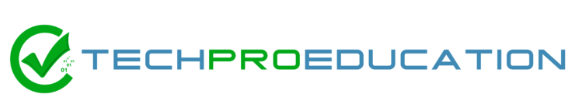

## Modelling & Model Performance

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [36]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [37]:
X_train.shape

(19436, 29)

tf.random.set_seed(seed) fonksiyonu, TensorFlow'da rastgele sayı üretme işlemlerinde kullanılan random seed değerini belirlemeye yarayan bir fonksiyondur. Bu fonksiyon, rastgele sayı üretirken kullanılan algoritmaların öngörülebilir olmasını sağlar.

Bu fonksiyon, TensorFlow'un yeniden üretilebilir sonuçlar vermesini sağlar. Yani, aynı parametrelerle yapılan işlemlerde aynı sonuçlar üretilir. Bu, özellikle modelin tekrarlanabilir olması gerektiği durumlarda faydalıdır.

Örneğin, modelin eğitimini her seferinde aynı başlangıç ​​noktasından başlatmak isteyebilirsiniz. Bu durumda, random seed değerini ayarlayarak her seferinde aynı başlangıç ​​noktasından başlatılmasını sağlayabilirsiniz.

Ayrıca, random seed değerini ayarlamak, örneğin veri kümesini eğitim ve doğrulama verilerine ayırmak gibi rastgele seçimlerde de kullanışlıdır. Bu sayede, aynı veri kümesi için farklı model yapılandırmaları test edildiğinde bile aynı eğitim ve doğrulama verilerinin kullanılması sağlanabilir.

In [38]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

Val loss (doğrulama kaybı) ve loss (eğitim kaybı), modelin eğitimi sırasında hesaplanan iki farklı hata ölçüsüdür.

Eğitim kaybı (loss), modelin eğitim verilerine ne kadar iyi uyduğunu ölçer. Modelin eğitim verilerine mükemmel bir şekilde uyduğu durumlarda, eğitim kaybı sıfıra yakın olur. Ancak, eğitim kaybı ne kadar düşük olursa olsun, bu her zaman modelin gerçek hayatta iyi performans göstereceği anlamına gelmez. Bu nedenle, modelin performansını değerlendirmek için doğrulama kaybı (val loss) hesaplanır.

Doğrulama kaybı (val loss), modelin eğitim verilerinin bir bölümü üzerinde eğitildiğinde, modelin performansını değerlendirmek için ayrılan bir diğer veri bölümüne (doğrulama verisi) karşı ne kadar iyi genelleştirildiğini ölçer. Doğrulama kaybı, eğitim kaybından daha yüksek olabilir, çünkü modelin yeni veriler üzerinde performansı daha düşük olabilir.

Genellikle, eğitim kaybı doğrulama kaybından daha düşüktür, ancak modelin overfitting yapması durumunda doğrulama kaybı yükselirken, eğitim kaybı düşük kalır. Bu nedenle, eğitim sürecinde doğrulama kaybının takibi önemlidir, çünkü modelin gerçek hayatta ne kadar iyi performans gösterdiği konusunda bir fikir verir ve overfitting durumunu tespit edebilir.

doğrulama kaybı (val loss), modelin eğitim verilerinin bir bölümü üzerinde eğitildiğinde, modelin performansını değerlendirmek için ayrılan bir diğer veri bölümüne (doğrulama verisi) karşı ne kadar iyi genelleştirildiğini ölçer. Bu doğrulama verisi, eğitim verilerinin bir bölümüdür ve validation split olarak adlandırılan bir işlemin sonucu olarak oluşur.

Validation split, veri kümesinin belirli bir yüzdesinin doğrulama verisi olarak ayrılmasıdır. Bu yüzde, genellikle %10 ile %30 arasında değişebilir ve bu oran, veri kümesinin büyüklüğüne ve modele göre değişebilir.

Eğitim sırasında, model, eğitim verilerinin bir bölümüne göre eğitilir ve doğrulama verileri üzerinde değerlendirilir. Doğrulama kaybı, modelin doğrulama verileri üzerindeki performansını ölçer ve modelin eğitim sırasında overfitting yapmamasını sağlar. Eğer doğrulama kaybı yüksek ise, bu aşırı uydurma belirtisi olabilir ve modelin eğitimi durdurulabilir veya model parametreleri değiştirilebilir.

Sonuç olarak, validation split için ayrılan oran, doğrulama kaybını kontrol etmek için kullanılır. Doğrulama verileri üzerinde ölçülen doğrulama kaybı, modelin performansını değerlendirmek için kullanılır ve eğitim sırasında modelin overfitting yapmasını önlemeye yardımcı olur.

In [39]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000)

Epoch 1/1000
130/130 [==============================] - 1s 4ms/step - loss: 428615663616.0000 - val_loss: 424005992448.0000
Epoch 2/1000
130/130 [==============================] - 0s 2ms/step - loss: 427168464896.0000 - val_loss: 417274298368.0000
Epoch 3/1000
130/130 [==============================] - 0s 2ms/step - loss: 383019253760.0000 - val_loss: 302047559680.0000
Epoch 4/1000
130/130 [==============================] - 0s 3ms/step - loss: 180830420992.0000 - val_loss: 106930012160.0000
Epoch 5/1000
130/130 [==============================] - 0s 2ms/step - loss: 97429094400.0000 - val_loss: 103456342016.0000
Epoch 6/1000
130/130 [==============================] - 0s 2ms/step - loss: 94888419328.0000 - val_loss: 101112700928.0000
Epoch 7/1000
130/130 [==============================] - 0s 2ms/step - loss: 92635029504.0000 - val_loss: 99118620672.0000
Epoch 8/1000
130/130 [==============================] - 0s 2ms/step - loss: 90344882176.0000 - val_loss: 96722075648.0000
Epoch 9/1000
1

130/130 [==============================] - 0s 2ms/step - loss: 33536696320.0000 - val_loss: 37485957120.0000
Epoch 68/1000
130/130 [==============================] - 0s 2ms/step - loss: 33374746624.0000 - val_loss: 37488418816.0000
Epoch 69/1000
130/130 [==============================] - 0s 2ms/step - loss: 33331019776.0000 - val_loss: 37375021056.0000
Epoch 70/1000
130/130 [==============================] - 0s 2ms/step - loss: 33239027712.0000 - val_loss: 37137321984.0000
Epoch 71/1000
130/130 [==============================] - 0s 2ms/step - loss: 33242411008.0000 - val_loss: 37340717056.0000
Epoch 72/1000
130/130 [==============================] - 0s 2ms/step - loss: 33079576576.0000 - val_loss: 36792274944.0000
Epoch 73/1000
130/130 [==============================] - 0s 2ms/step - loss: 33005078528.0000 - val_loss: 36771033088.0000
Epoch 74/1000
130/130 [==============================] - 0s 2ms/step - loss: 32951465984.0000 - val_loss: 36644601856.0000
Epoch 75/1000
130/130 [=======

130/130 [==============================] - 0s 2ms/step - loss: 30786332672.0000 - val_loss: 33637910528.0000
Epoch 134/1000
130/130 [==============================] - 0s 2ms/step - loss: 30829819904.0000 - val_loss: 33484779520.0000
Epoch 135/1000
130/130 [==============================] - 0s 2ms/step - loss: 30724251648.0000 - val_loss: 33458434048.0000
Epoch 136/1000
130/130 [==============================] - 0s 2ms/step - loss: 30664749056.0000 - val_loss: 33319567360.0000
Epoch 137/1000
130/130 [==============================] - 0s 2ms/step - loss: 30670030848.0000 - val_loss: 33377638400.0000
Epoch 138/1000
130/130 [==============================] - 0s 2ms/step - loss: 30610292736.0000 - val_loss: 33617639424.0000
Epoch 139/1000
130/130 [==============================] - 0s 3ms/step - loss: 30638684160.0000 - val_loss: 33306892288.0000
Epoch 140/1000
130/130 [==============================] - 0s 2ms/step - loss: 30569848832.0000 - val_loss: 33317801984.0000
Epoch 141/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 29612201984.0000 - val_loss: 32250877952.0000
Epoch 200/1000
130/130 [==============================] - 0s 2ms/step - loss: 29588047872.0000 - val_loss: 32030713856.0000
Epoch 201/1000
130/130 [==============================] - 0s 2ms/step - loss: 29609760768.0000 - val_loss: 32388196352.0000
Epoch 202/1000
130/130 [==============================] - 0s 2ms/step - loss: 29540648960.0000 - val_loss: 32275965952.0000
Epoch 203/1000
130/130 [==============================] - 0s 2ms/step - loss: 29505959936.0000 - val_loss: 32011104256.0000
Epoch 204/1000
130/130 [==============================] - 0s 2ms/step - loss: 29485176832.0000 - val_loss: 32271892480.0000
Epoch 205/1000
130/130 [==============================] - 0s 2ms/step - loss: 29502679040.0000 - val_loss: 32277551104.0000
Epoch 206/1000
130/130 [==============================] - 0s 2ms/step - loss: 29481553920.0000 - val_loss: 32260501504.0000
Epoch 207/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 28462206976.0000 - val_loss: 31051896832.0000
Epoch 266/1000
130/130 [==============================] - 0s 2ms/step - loss: 28417044480.0000 - val_loss: 30944346112.0000
Epoch 267/1000
130/130 [==============================] - 0s 2ms/step - loss: 28438425600.0000 - val_loss: 31011860480.0000
Epoch 268/1000
130/130 [==============================] - 0s 2ms/step - loss: 28403193856.0000 - val_loss: 30746871808.0000
Epoch 269/1000
130/130 [==============================] - 0s 2ms/step - loss: 28353837056.0000 - val_loss: 31155533824.0000
Epoch 270/1000
130/130 [==============================] - 0s 2ms/step - loss: 28384331776.0000 - val_loss: 31050383360.0000
Epoch 271/1000
130/130 [==============================] - 0s 2ms/step - loss: 28298274816.0000 - val_loss: 30764556288.0000
Epoch 272/1000
130/130 [==============================] - 0s 2ms/step - loss: 28326821888.0000 - val_loss: 30964150272.0000
Epoch 273/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 26864717824.0000 - val_loss: 29948579840.0000
Epoch 332/1000
130/130 [==============================] - 0s 2ms/step - loss: 26800689152.0000 - val_loss: 29583718400.0000
Epoch 333/1000
130/130 [==============================] - 0s 2ms/step - loss: 26770481152.0000 - val_loss: 29766037504.0000
Epoch 334/1000
130/130 [==============================] - 0s 2ms/step - loss: 26781607936.0000 - val_loss: 29677766656.0000
Epoch 335/1000
130/130 [==============================] - 0s 2ms/step - loss: 26735769600.0000 - val_loss: 29719216128.0000
Epoch 336/1000
130/130 [==============================] - 0s 2ms/step - loss: 26723182592.0000 - val_loss: 29345773568.0000
Epoch 337/1000
130/130 [==============================] - 0s 2ms/step - loss: 26716246016.0000 - val_loss: 29601648640.0000
Epoch 338/1000
130/130 [==============================] - 0s 2ms/step - loss: 26663325696.0000 - val_loss: 29757493248.0000
Epoch 339/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 25353828352.0000 - val_loss: 29001373696.0000
Epoch 398/1000
130/130 [==============================] - 0s 2ms/step - loss: 25380868096.0000 - val_loss: 28607725568.0000
Epoch 399/1000
130/130 [==============================] - 0s 2ms/step - loss: 25357596672.0000 - val_loss: 29103691776.0000
Epoch 400/1000
130/130 [==============================] - 0s 2ms/step - loss: 25405583360.0000 - val_loss: 28491169792.0000
Epoch 401/1000
130/130 [==============================] - 0s 2ms/step - loss: 25285113856.0000 - val_loss: 28513740800.0000
Epoch 402/1000
130/130 [==============================] - 0s 2ms/step - loss: 25273964544.0000 - val_loss: 28471758848.0000
Epoch 403/1000
130/130 [==============================] - 0s 2ms/step - loss: 25197217792.0000 - val_loss: 29202151424.0000
Epoch 404/1000
130/130 [==============================] - 0s 2ms/step - loss: 25231910912.0000 - val_loss: 28490323968.0000
Epoch 405/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 23439966208.0000 - val_loss: 27276392448.0000
Epoch 464/1000
130/130 [==============================] - 0s 2ms/step - loss: 23354863616.0000 - val_loss: 27385534464.0000
Epoch 465/1000
130/130 [==============================] - 0s 2ms/step - loss: 23318038528.0000 - val_loss: 27414949888.0000
Epoch 466/1000
130/130 [==============================] - 0s 2ms/step - loss: 23311779840.0000 - val_loss: 27201873920.0000
Epoch 467/1000
130/130 [==============================] - 0s 2ms/step - loss: 23320373248.0000 - val_loss: 27276378112.0000
Epoch 468/1000
130/130 [==============================] - 0s 2ms/step - loss: 23201626112.0000 - val_loss: 27407194112.0000
Epoch 469/1000
130/130 [==============================] - 0s 2ms/step - loss: 23209367552.0000 - val_loss: 27192334336.0000
Epoch 470/1000
130/130 [==============================] - 0s 2ms/step - loss: 23149602816.0000 - val_loss: 27255386112.0000
Epoch 471/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 20933675008.0000 - val_loss: 26099503104.0000
Epoch 530/1000
130/130 [==============================] - 0s 2ms/step - loss: 20896372736.0000 - val_loss: 26088941568.0000
Epoch 531/1000
130/130 [==============================] - 0s 2ms/step - loss: 20818956288.0000 - val_loss: 25956720640.0000
Epoch 532/1000
130/130 [==============================] - 0s 2ms/step - loss: 20815771648.0000 - val_loss: 26193891328.0000
Epoch 533/1000
130/130 [==============================] - 0s 2ms/step - loss: 20780765184.0000 - val_loss: 25890609152.0000
Epoch 534/1000
130/130 [==============================] - 0s 2ms/step - loss: 20724670464.0000 - val_loss: 25996083200.0000
Epoch 535/1000
130/130 [==============================] - 0s 2ms/step - loss: 20694581248.0000 - val_loss: 26059909120.0000
Epoch 536/1000
130/130 [==============================] - 0s 2ms/step - loss: 20681433088.0000 - val_loss: 25834248192.0000
Epoch 537/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 18671542272.0000 - val_loss: 25023238144.0000
Epoch 596/1000
130/130 [==============================] - 0s 2ms/step - loss: 18561050624.0000 - val_loss: 25550028800.0000
Epoch 597/1000
130/130 [==============================] - 0s 2ms/step - loss: 18634225664.0000 - val_loss: 25365594112.0000
Epoch 598/1000
130/130 [==============================] - 0s 2ms/step - loss: 18595190784.0000 - val_loss: 25118461952.0000
Epoch 599/1000
130/130 [==============================] - 0s 2ms/step - loss: 18489956352.0000 - val_loss: 25271961600.0000
Epoch 600/1000
130/130 [==============================] - 0s 2ms/step - loss: 18515136512.0000 - val_loss: 25092501504.0000
Epoch 601/1000
130/130 [==============================] - 0s 2ms/step - loss: 18443345920.0000 - val_loss: 25161138176.0000
Epoch 602/1000
130/130 [==============================] - 0s 2ms/step - loss: 18469351424.0000 - val_loss: 25009526784.0000
Epoch 603/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 17124703232.0000 - val_loss: 25256288256.0000
Epoch 662/1000
130/130 [==============================] - 0s 2ms/step - loss: 17220134912.0000 - val_loss: 24920393728.0000
Epoch 663/1000
130/130 [==============================] - 0s 2ms/step - loss: 17064082432.0000 - val_loss: 24915027968.0000
Epoch 664/1000
130/130 [==============================] - 0s 2ms/step - loss: 17081488384.0000 - val_loss: 25157185536.0000
Epoch 665/1000
130/130 [==============================] - 0s 2ms/step - loss: 17067443200.0000 - val_loss: 25235611648.0000
Epoch 666/1000
130/130 [==============================] - 0s 2ms/step - loss: 17067267072.0000 - val_loss: 24908228608.0000
Epoch 667/1000
130/130 [==============================] - 0s 3ms/step - loss: 17088563200.0000 - val_loss: 25198737408.0000
Epoch 668/1000
130/130 [==============================] - 0s 2ms/step - loss: 17034363904.0000 - val_loss: 25018120192.0000
Epoch 669/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 16051403776.0000 - val_loss: 24853954560.0000
Epoch 728/1000
130/130 [==============================] - 0s 2ms/step - loss: 16056241152.0000 - val_loss: 25035460608.0000
Epoch 729/1000
130/130 [==============================] - 0s 2ms/step - loss: 15985776640.0000 - val_loss: 25473372160.0000
Epoch 730/1000
130/130 [==============================] - 0s 2ms/step - loss: 15984837632.0000 - val_loss: 25186299904.0000
Epoch 731/1000
130/130 [==============================] - 0s 2ms/step - loss: 16007219200.0000 - val_loss: 24932001792.0000
Epoch 732/1000
130/130 [==============================] - 0s 2ms/step - loss: 15983104000.0000 - val_loss: 24767236096.0000
Epoch 733/1000
130/130 [==============================] - 0s 2ms/step - loss: 15993437184.0000 - val_loss: 25084114944.0000
Epoch 734/1000
130/130 [==============================] - 0s 2ms/step - loss: 15960744960.0000 - val_loss: 24825010176.0000
Epoch 735/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 15345984512.0000 - val_loss: 25222320128.0000
Epoch 794/1000
130/130 [==============================] - 0s 2ms/step - loss: 15246411776.0000 - val_loss: 24955768832.0000
Epoch 795/1000
130/130 [==============================] - 0s 2ms/step - loss: 15249293312.0000 - val_loss: 24955469824.0000
Epoch 796/1000
130/130 [==============================] - 0s 2ms/step - loss: 15255116800.0000 - val_loss: 24938135552.0000
Epoch 797/1000
130/130 [==============================] - 0s 2ms/step - loss: 15196831744.0000 - val_loss: 25118640128.0000
Epoch 798/1000
130/130 [==============================] - 0s 2ms/step - loss: 15302281216.0000 - val_loss: 24765788160.0000
Epoch 799/1000
130/130 [==============================] - 0s 2ms/step - loss: 15223808000.0000 - val_loss: 25056964608.0000
Epoch 800/1000
130/130 [==============================] - 0s 2ms/step - loss: 15175027712.0000 - val_loss: 24911505408.0000
Epoch 801/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 14678062080.0000 - val_loss: 24905334784.0000
Epoch 860/1000
130/130 [==============================] - 0s 2ms/step - loss: 14694701056.0000 - val_loss: 24959250432.0000
Epoch 861/1000
130/130 [==============================] - 0s 2ms/step - loss: 14695291904.0000 - val_loss: 25289041920.0000
Epoch 862/1000
130/130 [==============================] - 0s 2ms/step - loss: 14639003648.0000 - val_loss: 25635729408.0000
Epoch 863/1000
130/130 [==============================] - 0s 2ms/step - loss: 14776890368.0000 - val_loss: 25349206016.0000
Epoch 864/1000
130/130 [==============================] - 0s 2ms/step - loss: 14632705024.0000 - val_loss: 25142781952.0000
Epoch 865/1000
130/130 [==============================] - 0s 2ms/step - loss: 14616006656.0000 - val_loss: 24978964480.0000
Epoch 866/1000
130/130 [==============================] - 0s 2ms/step - loss: 14590756864.0000 - val_loss: 25035169792.0000
Epoch 867/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 14174376960.0000 - val_loss: 24689692672.0000
Epoch 926/1000
130/130 [==============================] - 0s 2ms/step - loss: 14180667392.0000 - val_loss: 25075462144.0000
Epoch 927/1000
130/130 [==============================] - 0s 2ms/step - loss: 14149103616.0000 - val_loss: 25165381632.0000
Epoch 928/1000
130/130 [==============================] - 0s 2ms/step - loss: 14089140224.0000 - val_loss: 24842217472.0000
Epoch 929/1000
130/130 [==============================] - 0s 2ms/step - loss: 14154157056.0000 - val_loss: 25193080832.0000
Epoch 930/1000
130/130 [==============================] - 0s 2ms/step - loss: 14140853248.0000 - val_loss: 24946083840.0000
Epoch 931/1000
130/130 [==============================] - 0s 2ms/step - loss: 14112288768.0000 - val_loss: 24894838784.0000
Epoch 932/1000
130/130 [==============================] - 0s 3ms/step - loss: 14124732416.0000 - val_loss: 24776882176.0000
Epoch 933/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 13812921344.0000 - val_loss: 24510625792.0000
Epoch 992/1000
130/130 [==============================] - 0s 2ms/step - loss: 13642153984.0000 - val_loss: 24460378112.0000
Epoch 993/1000
130/130 [==============================] - 0s 2ms/step - loss: 13837921280.0000 - val_loss: 24668416000.0000
Epoch 994/1000
130/130 [==============================] - 0s 2ms/step - loss: 13635908608.0000 - val_loss: 24685645824.0000
Epoch 995/1000
130/130 [==============================] - 0s 2ms/step - loss: 13610133504.0000 - val_loss: 24595142656.0000
Epoch 996/1000
130/130 [==============================] - 0s 2ms/step - loss: 13654168576.0000 - val_loss: 24514453504.0000
Epoch 997/1000
130/130 [==============================] - 0s 2ms/step - loss: 13583799296.0000 - val_loss: 24913502208.0000
Epoch 998/1000
130/130 [==============================] - 0s 2ms/step - loss: 13856617472.0000 - val_loss: 24512301056.0000
Epoch 999/1000
130/130 

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                960       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,745
Trainable params: 3,745
Non-trainabl

In [41]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,428615663616.000,424005992448.000
1,427168464896.000,417274298368.000
2,383019253760.000,302047559680.000
3,180830420992.000,106930012160.000
4,97429094400.000,103456342016.000
...,...,...
995,13654168576.000,24514453504.000
996,13583799296.000,24913502208.000
997,13856617472.000,24512301056.000
998,13603989504.000,24457515008.000


<Axes: >

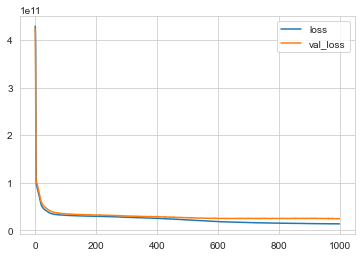

In [42]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [43]:
model.evaluate(X_test, y_test, verbose=0)

16870663168.0

In [44]:
y_pred = model.predict(X_test)

In [45]:
eval_metric(y_test, y_pred)

r2_score: 0.8686901090689281 
mae: 76252.02490957755 
mse: 16870663526.816616 
rmse: 129887.11840215955


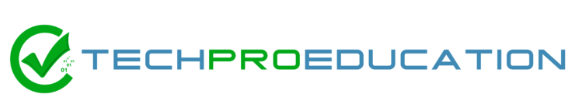

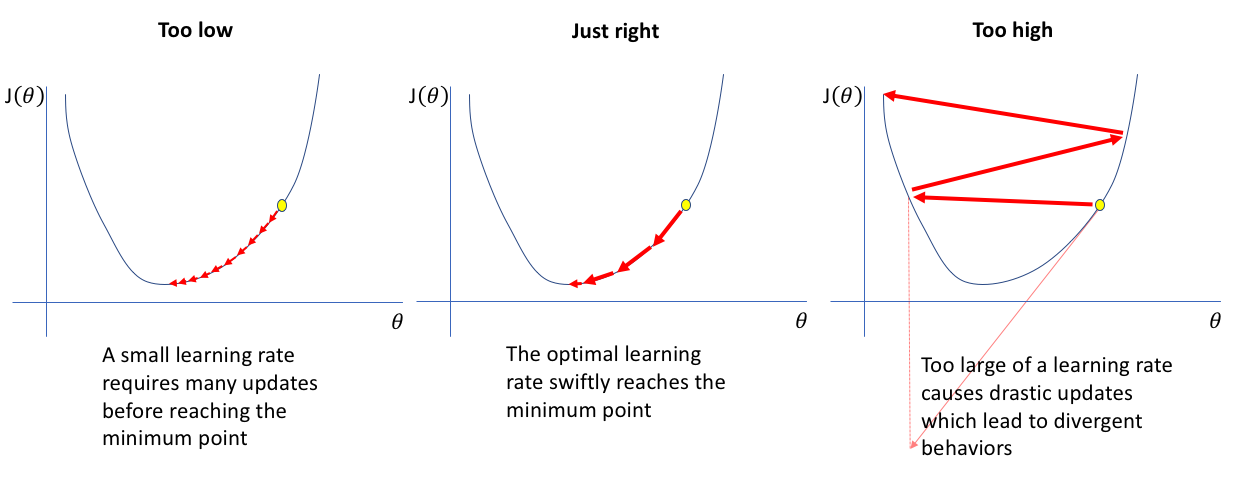

# learning_rate

Learning rate (öğrenme oranı), derin öğrenme modellerinin eğitiminde önemli bir hiperparametredir. Bu parametre, modelin ne kadar hızlı veya yavaş öğreneceğini belirler.

Öğrenme oranı, gradient descent yöntemi kullanılarak modelin ağırlıklarının güncellenmesinde kullanılır. Gradient descent, loss fonksiyonunun minimum değerine ulaşmak için modelin ağırlıklarının güncellenmesi için kullanılan bir optimizasyon algoritmasıdır. Gradient descent'in temel amacı, loss fonksiyonunun minimum noktasına doğru bir adım atarak, modelin loss değerini azaltmaktır.

Öğrenme oranı, her bir ağırlık güncelleme adımının ne kadar büyük veya küçük olacağını belirler. Öğrenme oranı ne kadar yüksekse, ağırlıkların güncellenmesi o kadar hızlı gerçekleşir ve model daha hızlı öğrenir. Ancak, öğrenme oranı çok yüksek olursa, ağırlıkların güncellenmesi o kadar büyük olur ki, modelin doğru minimum noktasını bulması zorlaşır. Öğrenme oranı ne kadar düşükse, ağırlıkların güncellenmesi o kadar yavaş gerçekleşir ve model daha yavaş öğrenir. Ancak, öğrenme oranı çok düşük olursa, modelin yeterince hızlı öğrenememesi ve minimum noktaya ulaşamaması gibi sorunlar ortaya çıkabilir.

Optimal öğrenme oranı, veri setine, modelin karmaşıklığına ve eğitim algoritmasına bağlı olarak değişebilir. İdeal öğrenme oranı, modelin loss değerini minimuma indirmesi için en uygun oranı sağlar. Öğrenme oranının belirlenmesi, eğitim sırasında kullanılan validation set ile kontrol edilir ve hiperparametre ayarlaması yapılır.

In [46]:
from tensorflow.keras.optimizers import Adam

In [47]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

opt = Adam(lr = 0.003) # default learning rate value is 0.001
model.compile(optimizer = opt, loss = 'mse')

In [48]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 64, epochs = 1000)

Epoch 1/1000
259/259 [==============================] - 1s 3ms/step - loss: 321008861184.0000 - val_loss: 103514447872.0000
Epoch 2/1000
259/259 [==============================] - 1s 2ms/step - loss: 89714581504.0000 - val_loss: 90514964480.0000
Epoch 3/1000
259/259 [==============================] - 1s 2ms/step - loss: 75178606592.0000 - val_loss: 74664452096.0000
Epoch 4/1000
259/259 [==============================] - 1s 2ms/step - loss: 59556896768.0000 - val_loss: 60174626816.0000
Epoch 5/1000
259/259 [==============================] - 1s 2ms/step - loss: 50318643200.0000 - val_loss: 53752762368.0000
Epoch 6/1000
259/259 [==============================] - 1s 2ms/step - loss: 45884231680.0000 - val_loss: 50287468544.0000
Epoch 7/1000
259/259 [==============================] - 1s 2ms/step - loss: 42888851456.0000 - val_loss: 47197945856.0000
Epoch 8/1000
259/259 [==============================] - 1s 2ms/step - loss: 40676536320.0000 - val_loss: 45533405184.0000
Epoch 9/1000
259/259 [

259/259 [==============================] - 1s 2ms/step - loss: 28711417856.0000 - val_loss: 31943628800.0000
Epoch 68/1000
259/259 [==============================] - 1s 2ms/step - loss: 28634476544.0000 - val_loss: 33389703168.0000
Epoch 69/1000
259/259 [==============================] - 0s 2ms/step - loss: 28621129728.0000 - val_loss: 30910271488.0000
Epoch 70/1000
259/259 [==============================] - 1s 2ms/step - loss: 28494860288.0000 - val_loss: 30651639808.0000
Epoch 71/1000
259/259 [==============================] - 0s 2ms/step - loss: 28497461248.0000 - val_loss: 31235766272.0000
Epoch 72/1000
259/259 [==============================] - 1s 2ms/step - loss: 28437209088.0000 - val_loss: 30764969984.0000
Epoch 73/1000
259/259 [==============================] - 1s 2ms/step - loss: 28357785600.0000 - val_loss: 31249739776.0000
Epoch 74/1000
259/259 [==============================] - 1s 2ms/step - loss: 28385402880.0000 - val_loss: 30526920704.0000
Epoch 75/1000
259/259 [=======

259/259 [==============================] - 1s 2ms/step - loss: 25322420224.0000 - val_loss: 29373030400.0000
Epoch 134/1000
259/259 [==============================] - 1s 2ms/step - loss: 25356056576.0000 - val_loss: 29479774208.0000
Epoch 135/1000
259/259 [==============================] - 1s 2ms/step - loss: 25365209088.0000 - val_loss: 29201489920.0000
Epoch 136/1000
259/259 [==============================] - 1s 2ms/step - loss: 25213734912.0000 - val_loss: 29353799680.0000
Epoch 137/1000
259/259 [==============================] - 1s 2ms/step - loss: 25295020032.0000 - val_loss: 29065185280.0000
Epoch 138/1000
259/259 [==============================] - 1s 2ms/step - loss: 25155002368.0000 - val_loss: 29655287808.0000
Epoch 139/1000
259/259 [==============================] - 1s 2ms/step - loss: 25279019008.0000 - val_loss: 29362372608.0000
Epoch 140/1000
259/259 [==============================] - 1s 2ms/step - loss: 24985237504.0000 - val_loss: 29949116416.0000
Epoch 141/1000
259/259 

259/259 [==============================] - 1s 2ms/step - loss: 23991392256.0000 - val_loss: 30398881792.0000
Epoch 200/1000
259/259 [==============================] - 1s 2ms/step - loss: 23815075840.0000 - val_loss: 30326632448.0000
Epoch 201/1000
259/259 [==============================] - 0s 2ms/step - loss: 23802828800.0000 - val_loss: 30440198144.0000
Epoch 202/1000
259/259 [==============================] - 0s 2ms/step - loss: 23875790848.0000 - val_loss: 30472570880.0000
Epoch 203/1000
259/259 [==============================] - 1s 2ms/step - loss: 23751106560.0000 - val_loss: 30201720832.0000
Epoch 204/1000
259/259 [==============================] - 1s 2ms/step - loss: 23942641664.0000 - val_loss: 31857104896.0000
Epoch 205/1000
259/259 [==============================] - 1s 2ms/step - loss: 23913121792.0000 - val_loss: 30505345024.0000
Epoch 206/1000
259/259 [==============================] - 1s 2ms/step - loss: 23782144000.0000 - val_loss: 30856968192.0000
Epoch 207/1000
259/259 

259/259 [==============================] - 1s 2ms/step - loss: 21969885184.0000 - val_loss: 29083246592.0000
Epoch 266/1000
259/259 [==============================] - 1s 2ms/step - loss: 21674399744.0000 - val_loss: 28162846720.0000
Epoch 267/1000
259/259 [==============================] - 1s 2ms/step - loss: 21399629824.0000 - val_loss: 27974187008.0000
Epoch 268/1000
259/259 [==============================] - 1s 2ms/step - loss: 21153335296.0000 - val_loss: 27702728704.0000
Epoch 269/1000
259/259 [==============================] - 0s 2ms/step - loss: 20828346368.0000 - val_loss: 28382441472.0000
Epoch 270/1000
259/259 [==============================] - 0s 2ms/step - loss: 20815163392.0000 - val_loss: 27584847872.0000
Epoch 271/1000
259/259 [==============================] - 0s 2ms/step - loss: 20479565824.0000 - val_loss: 27137419264.0000
Epoch 272/1000
259/259 [==============================] - 1s 2ms/step - loss: 20378292224.0000 - val_loss: 26729199616.0000
Epoch 273/1000
259/259 

259/259 [==============================] - 1s 2ms/step - loss: 16451801088.0000 - val_loss: 24093239296.0000
Epoch 332/1000
259/259 [==============================] - 1s 2ms/step - loss: 16353406976.0000 - val_loss: 24231063552.0000
Epoch 333/1000
259/259 [==============================] - 1s 2ms/step - loss: 16272502784.0000 - val_loss: 24140906496.0000
Epoch 334/1000
259/259 [==============================] - 1s 2ms/step - loss: 16418097152.0000 - val_loss: 23956998144.0000
Epoch 335/1000
259/259 [==============================] - 1s 2ms/step - loss: 16308314112.0000 - val_loss: 24057061376.0000
Epoch 336/1000
259/259 [==============================] - 1s 2ms/step - loss: 16281796608.0000 - val_loss: 24021651456.0000
Epoch 337/1000
259/259 [==============================] - 1s 2ms/step - loss: 16279215104.0000 - val_loss: 23996538880.0000
Epoch 338/1000
259/259 [==============================] - 1s 2ms/step - loss: 16295958528.0000 - val_loss: 24040056832.0000
Epoch 339/1000
259/259 

259/259 [==============================] - 0s 2ms/step - loss: 15335121920.0000 - val_loss: 23640893440.0000
Epoch 398/1000
259/259 [==============================] - 1s 2ms/step - loss: 15318018048.0000 - val_loss: 23802787840.0000
Epoch 399/1000
259/259 [==============================] - 0s 2ms/step - loss: 15319203840.0000 - val_loss: 24159369216.0000
Epoch 400/1000
259/259 [==============================] - 0s 2ms/step - loss: 15307507712.0000 - val_loss: 23531614208.0000
Epoch 401/1000
259/259 [==============================] - 0s 2ms/step - loss: 15327400960.0000 - val_loss: 23302053888.0000
Epoch 402/1000
259/259 [==============================] - 1s 2ms/step - loss: 15154884608.0000 - val_loss: 24127461376.0000
Epoch 403/1000
259/259 [==============================] - 0s 2ms/step - loss: 15236875264.0000 - val_loss: 23809728512.0000
Epoch 404/1000
259/259 [==============================] - 1s 2ms/step - loss: 15091588096.0000 - val_loss: 22955427840.0000
Epoch 405/1000
259/259 

259/259 [==============================] - 1s 2ms/step - loss: 13370989568.0000 - val_loss: 22556508160.0000
Epoch 464/1000
259/259 [==============================] - 0s 2ms/step - loss: 13314361344.0000 - val_loss: 22305120256.0000
Epoch 465/1000
259/259 [==============================] - 0s 2ms/step - loss: 13227411456.0000 - val_loss: 24151326720.0000
Epoch 466/1000
259/259 [==============================] - 0s 2ms/step - loss: 13313212416.0000 - val_loss: 22768351232.0000
Epoch 467/1000
259/259 [==============================] - 0s 2ms/step - loss: 13256147968.0000 - val_loss: 22505560064.0000
Epoch 468/1000
259/259 [==============================] - 0s 2ms/step - loss: 13362957312.0000 - val_loss: 22440855552.0000
Epoch 469/1000
259/259 [==============================] - 1s 2ms/step - loss: 13345225728.0000 - val_loss: 22465259520.0000
Epoch 470/1000
259/259 [==============================] - 0s 2ms/step - loss: 13266691072.0000 - val_loss: 23252025344.0000
Epoch 471/1000
259/259 

259/259 [==============================] - 0s 2ms/step - loss: 12332076032.0000 - val_loss: 21988212736.0000
Epoch 530/1000
259/259 [==============================] - 0s 2ms/step - loss: 12093522944.0000 - val_loss: 21184774144.0000
Epoch 531/1000
259/259 [==============================] - 0s 2ms/step - loss: 12075326464.0000 - val_loss: 21705510912.0000
Epoch 532/1000
259/259 [==============================] - 1s 2ms/step - loss: 12051240960.0000 - val_loss: 23093067776.0000
Epoch 533/1000
259/259 [==============================] - 0s 2ms/step - loss: 12018893824.0000 - val_loss: 21639157760.0000
Epoch 534/1000
259/259 [==============================] - 1s 2ms/step - loss: 11986536448.0000 - val_loss: 22259830784.0000
Epoch 535/1000
259/259 [==============================] - 1s 2ms/step - loss: 11920561152.0000 - val_loss: 20929564672.0000
Epoch 536/1000
259/259 [==============================] - 1s 2ms/step - loss: 12009811968.0000 - val_loss: 22018992128.0000
Epoch 537/1000
259/259 

259/259 [==============================] - 0s 2ms/step - loss: 11163469824.0000 - val_loss: 20677771264.0000
Epoch 596/1000
259/259 [==============================] - 0s 2ms/step - loss: 11199298560.0000 - val_loss: 23315662848.0000
Epoch 597/1000
259/259 [==============================] - 0s 2ms/step - loss: 11313386496.0000 - val_loss: 20678162432.0000
Epoch 598/1000
259/259 [==============================] - 1s 2ms/step - loss: 11315615744.0000 - val_loss: 20155901952.0000
Epoch 599/1000
259/259 [==============================] - 0s 2ms/step - loss: 11195470848.0000 - val_loss: 20607840256.0000
Epoch 600/1000
259/259 [==============================] - 1s 2ms/step - loss: 11174064128.0000 - val_loss: 19913355264.0000
Epoch 601/1000
259/259 [==============================] - 0s 2ms/step - loss: 11182573568.0000 - val_loss: 20541042688.0000
Epoch 602/1000
259/259 [==============================] - 1s 2ms/step - loss: 11085195264.0000 - val_loss: 20802793472.0000
Epoch 603/1000
259/259 

259/259 [==============================] - 1s 2ms/step - loss: 10535503872.0000 - val_loss: 20428511232.0000
Epoch 662/1000
259/259 [==============================] - 1s 2ms/step - loss: 10409954304.0000 - val_loss: 19834904576.0000
Epoch 663/1000
259/259 [==============================] - 1s 2ms/step - loss: 10553573376.0000 - val_loss: 20205549568.0000
Epoch 664/1000
259/259 [==============================] - 1s 2ms/step - loss: 10448288768.0000 - val_loss: 20204814336.0000
Epoch 665/1000
259/259 [==============================] - 1s 2ms/step - loss: 10494879744.0000 - val_loss: 20841140224.0000
Epoch 666/1000
259/259 [==============================] - 1s 2ms/step - loss: 10423382016.0000 - val_loss: 20451399680.0000
Epoch 667/1000
259/259 [==============================] - 1s 2ms/step - loss: 10459940864.0000 - val_loss: 19817035776.0000
Epoch 668/1000
259/259 [==============================] - 1s 2ms/step - loss: 10576305152.0000 - val_loss: 19977703424.0000
Epoch 669/1000
259/259 

259/259 [==============================] - 1s 2ms/step - loss: 10073607168.0000 - val_loss: 19742736384.0000
Epoch 728/1000
259/259 [==============================] - 1s 2ms/step - loss: 10061956096.0000 - val_loss: 22830970880.0000
Epoch 729/1000
259/259 [==============================] - 1s 2ms/step - loss: 10237897728.0000 - val_loss: 19428311040.0000
Epoch 730/1000
259/259 [==============================] - 1s 2ms/step - loss: 10075165696.0000 - val_loss: 20180017152.0000
Epoch 731/1000
259/259 [==============================] - 1s 2ms/step - loss: 10129476608.0000 - val_loss: 20623849472.0000
Epoch 732/1000
259/259 [==============================] - 0s 2ms/step - loss: 10060068864.0000 - val_loss: 19901523968.0000
Epoch 733/1000
259/259 [==============================] - 0s 2ms/step - loss: 10154730496.0000 - val_loss: 19971596288.0000
Epoch 734/1000
259/259 [==============================] - 0s 2ms/step - loss: 10187286528.0000 - val_loss: 19819864064.0000
Epoch 735/1000
259/259 

259/259 [==============================] - 0s 2ms/step - loss: 9872683008.0000 - val_loss: 21184808960.0000
Epoch 794/1000
259/259 [==============================] - 1s 2ms/step - loss: 9966992384.0000 - val_loss: 18939699200.0000
Epoch 795/1000
259/259 [==============================] - 0s 2ms/step - loss: 10139631616.0000 - val_loss: 19472189440.0000
Epoch 796/1000
259/259 [==============================] - 1s 2ms/step - loss: 9756268544.0000 - val_loss: 19451009024.0000
Epoch 797/1000
259/259 [==============================] - 0s 2ms/step - loss: 9995367424.0000 - val_loss: 19170658304.0000
Epoch 798/1000
259/259 [==============================] - 1s 2ms/step - loss: 9811374080.0000 - val_loss: 19135741952.0000
Epoch 799/1000
259/259 [==============================] - 1s 2ms/step - loss: 9853879296.0000 - val_loss: 19356213248.0000
Epoch 800/1000
259/259 [==============================] - 1s 2ms/step - loss: 9954955264.0000 - val_loss: 19178854400.0000
Epoch 801/1000
259/259 [======

259/259 [==============================] - 0s 2ms/step - loss: 9700304896.0000 - val_loss: 19445708800.0000
Epoch 860/1000
259/259 [==============================] - 1s 2ms/step - loss: 9604359168.0000 - val_loss: 19389356032.0000
Epoch 861/1000
259/259 [==============================] - 1s 2ms/step - loss: 9489401856.0000 - val_loss: 19981324288.0000
Epoch 862/1000
259/259 [==============================] - 1s 2ms/step - loss: 9535541248.0000 - val_loss: 20311836672.0000
Epoch 863/1000
259/259 [==============================] - 1s 2ms/step - loss: 9556984832.0000 - val_loss: 19271964672.0000
Epoch 864/1000
259/259 [==============================] - 0s 2ms/step - loss: 9551891456.0000 - val_loss: 19141283840.0000
Epoch 865/1000
259/259 [==============================] - 0s 2ms/step - loss: 9589329920.0000 - val_loss: 19453759488.0000
Epoch 866/1000
259/259 [==============================] - 1s 2ms/step - loss: 9333486592.0000 - val_loss: 19224885248.0000
Epoch 867/1000
259/259 [=======

259/259 [==============================] - 1s 2ms/step - loss: 9298866176.0000 - val_loss: 20210145280.0000
Epoch 926/1000
259/259 [==============================] - 1s 2ms/step - loss: 9171374080.0000 - val_loss: 19643676672.0000
Epoch 927/1000
259/259 [==============================] - 0s 2ms/step - loss: 9106696192.0000 - val_loss: 20451424256.0000
Epoch 928/1000
259/259 [==============================] - 0s 2ms/step - loss: 9165580288.0000 - val_loss: 19826423808.0000
Epoch 929/1000
259/259 [==============================] - 0s 2ms/step - loss: 9286755328.0000 - val_loss: 20762669056.0000
Epoch 930/1000
259/259 [==============================] - 1s 2ms/step - loss: 9253476352.0000 - val_loss: 19776272384.0000
Epoch 931/1000
259/259 [==============================] - 0s 2ms/step - loss: 9195883520.0000 - val_loss: 19453634560.0000
Epoch 932/1000
259/259 [==============================] - 1s 2ms/step - loss: 9251468288.0000 - val_loss: 20180461568.0000
Epoch 933/1000
259/259 [=======

Epoch 992/1000
259/259 [==============================] - 1s 3ms/step - loss: 9026305024.0000 - val_loss: 19397345280.0000
Epoch 993/1000
259/259 [==============================] - 1s 2ms/step - loss: 9000192000.0000 - val_loss: 19229534208.0000
Epoch 994/1000
259/259 [==============================] - 1s 3ms/step - loss: 9121872896.0000 - val_loss: 20648126464.0000
Epoch 995/1000
259/259 [==============================] - 1s 3ms/step - loss: 8977375232.0000 - val_loss: 19088211968.0000
Epoch 996/1000
259/259 [==============================] - 1s 3ms/step - loss: 8889966592.0000 - val_loss: 18687000576.0000
Epoch 997/1000
259/259 [==============================] - 1s 2ms/step - loss: 8999567360.0000 - val_loss: 19938017280.0000
Epoch 998/1000
259/259 [==============================] - 1s 3ms/step - loss: 8908235776.0000 - val_loss: 19971004416.0000
Epoch 999/1000
259/259 [==============================] - 1s 3ms/step - loss: 8955453440.0000 - val_loss: 20787996672.0000
Epoch 1000/1000


<Axes: >

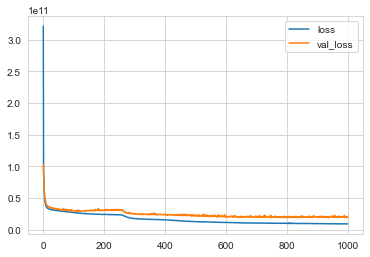

In [49]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [50]:
y_pred = model.predict(X_test)

In [51]:
eval_metric(y_test, y_pred)

r2_score: 0.8874779517166824 
mae: 68503.14266854746 
mse: 14456805976.120594 
rmse: 120236.45859771733


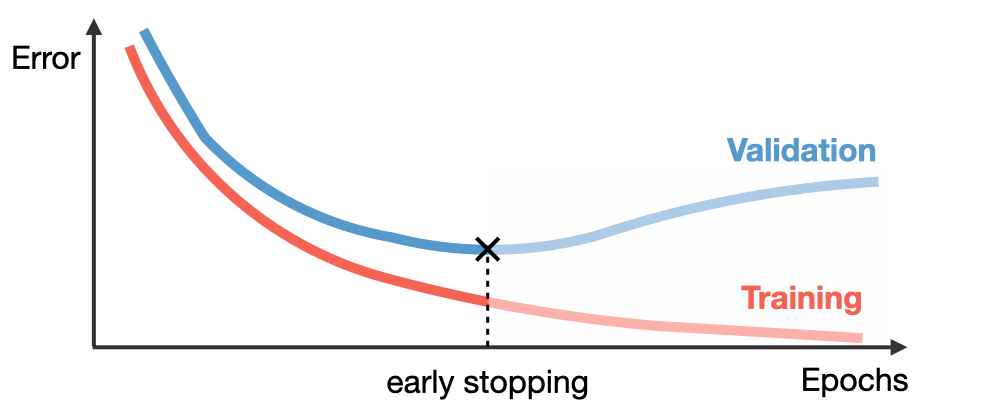

### EarlyStopping

Early stopping, derin öğrenme modellerinde overfitting (aşırı öğrenme) sorununu önlemek için kullanılan bir tekniktir. Bu teknik, eğitim sırasında modelin belirli bir noktada eğitimden çıkarılmasını sağlayarak, overfitting riskini azaltır.

Early stopping, modelin aşırı uyumu engellemek için, eğitim sırasında oluşan validation loss değerlerinin incelenmesiyle gerçekleştirilir. Eğitim sırasında, her epoch sonunda modelin validation set üzerindeki loss değeri hesaplanır. Bu değerler, bir "patlama" yaşanmadan önceki en düşük kayıp değerini kaydeder.

Patlama, modelin aşırı öğrenme durumunda aşırı uygunluk gösterdiği ve validation loss'un arttığı bir noktadır. Early stopping tekniği, patlamadan sonra, modelin daha iyi bir performans gösteremeyeceğini varsayarak, eğitimi sonlandırır.

Early stopping, modelin aşırı uyumu önlerken, aynı zamanda zaman ve işlemci gücü kaynaklarını tasarruf etmeye yardımcı olabilir. Ancak, early stopping'in kullanımı, doğru bir şekilde uygulanmalı ve optimal bir epoch sayısı seçilmelidir. Aksi takdirde, modelin yeterince eğitim alamaması veya eğitimin erken sona ermesi gibi sorunlar ortaya çıkabilir.

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = 'mse')

In [54]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 50)

In [55]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
130/130 [==============================] - 1s 3ms/step - loss: 427186356224.0000 - val_loss: 408840765440.0000
Epoch 2/1000
130/130 [==============================] - 0s 3ms/step - loss: 211299942400.0000 - val_loss: 103160053760.0000
Epoch 3/1000
130/130 [==============================] - 0s 2ms/step - loss: 92372877312.0000 - val_loss: 96189038592.0000
Epoch 4/1000
130/130 [==============================] - 0s 3ms/step - loss: 85047222272.0000 - val_loss: 88859828224.0000
Epoch 5/1000
130/130 [==============================] - 0s 2ms/step - loss: 77008568320.0000 - val_loss: 80298000384.0000
Epoch 6/1000
130/130 [==============================] - 0s 2ms/step - loss: 68135264256.0000 - val_loss: 70885556224.0000
Epoch 7/1000
130/130 [==============================] - 0s 2ms/step - loss: 59502637056.0000 - val_loss: 62832861184.0000
Epoch 8/1000
130/130 [==============================] - 0s 2ms/step - loss: 53386371072.0000 - val_loss: 57846591488.0000
Epoch 9/1000
130/130

130/130 [==============================] - 0s 2ms/step - loss: 29859133440.0000 - val_loss: 32225482752.0000
Epoch 68/1000
130/130 [==============================] - 0s 2ms/step - loss: 29717843968.0000 - val_loss: 32695148544.0000
Epoch 69/1000
130/130 [==============================] - 0s 2ms/step - loss: 29828478976.0000 - val_loss: 32228358144.0000
Epoch 70/1000
130/130 [==============================] - 0s 2ms/step - loss: 29637744640.0000 - val_loss: 31968948224.0000
Epoch 71/1000
130/130 [==============================] - 0s 2ms/step - loss: 29741273088.0000 - val_loss: 32068470784.0000
Epoch 72/1000
130/130 [==============================] - 0s 2ms/step - loss: 29577455616.0000 - val_loss: 31865257984.0000
Epoch 73/1000
130/130 [==============================] - 0s 2ms/step - loss: 29547759616.0000 - val_loss: 31983771648.0000
Epoch 74/1000
130/130 [==============================] - 0s 2ms/step - loss: 29472708608.0000 - val_loss: 32331567104.0000
Epoch 75/1000
130/130 [=======

130/130 [==============================] - 0s 2ms/step - loss: 27196114944.0000 - val_loss: 29867051008.0000
Epoch 134/1000
130/130 [==============================] - 0s 2ms/step - loss: 27203768320.0000 - val_loss: 29730271232.0000
Epoch 135/1000
130/130 [==============================] - 0s 2ms/step - loss: 27054833664.0000 - val_loss: 29636491264.0000
Epoch 136/1000
130/130 [==============================] - 0s 2ms/step - loss: 27030829056.0000 - val_loss: 29436319744.0000
Epoch 137/1000
130/130 [==============================] - 0s 2ms/step - loss: 26961207296.0000 - val_loss: 29465239552.0000
Epoch 138/1000
130/130 [==============================] - 0s 2ms/step - loss: 26839506944.0000 - val_loss: 30391128064.0000
Epoch 139/1000
130/130 [==============================] - 0s 2ms/step - loss: 26959003648.0000 - val_loss: 29680123904.0000
Epoch 140/1000
130/130 [==============================] - 0s 2ms/step - loss: 26745980928.0000 - val_loss: 30105804800.0000
Epoch 141/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 25428973568.0000 - val_loss: 29694754816.0000
Epoch 200/1000
130/130 [==============================] - 0s 2ms/step - loss: 25306458112.0000 - val_loss: 29469636608.0000
Epoch 201/1000
130/130 [==============================] - 0s 2ms/step - loss: 25169960960.0000 - val_loss: 30132860928.0000
Epoch 202/1000
130/130 [==============================] - 0s 2ms/step - loss: 25258309632.0000 - val_loss: 30404372480.0000
Epoch 203/1000
130/130 [==============================] - 0s 2ms/step - loss: 25120114688.0000 - val_loss: 29525575680.0000
Epoch 204/1000
130/130 [==============================] - 0s 2ms/step - loss: 25160378368.0000 - val_loss: 30713499648.0000
Epoch 205/1000
130/130 [==============================] - 0s 2ms/step - loss: 25208233984.0000 - val_loss: 29748299776.0000
Epoch 206/1000
130/130 [==============================] - 0s 2ms/step - loss: 25097340928.0000 - val_loss: 29858533376.0000
Epoch 207/1000
130/130 

<Axes: >

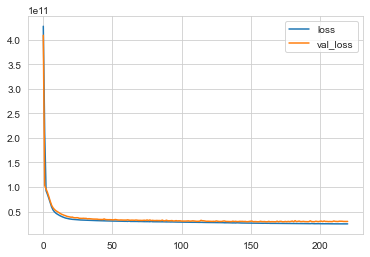

In [56]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [57]:
y_pred = model.predict(X_test)

In [58]:
eval_metric(y_test, y_pred)

r2_score: 0.8257035146727515 
mae: 94210.5050708912 
mse: 22393570941.326004 
rmse: 149644.8159520603


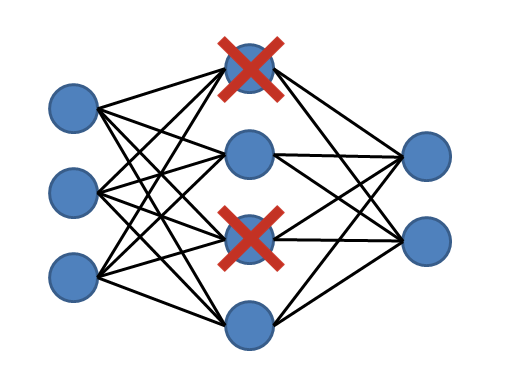

### Dropout

The Dropout layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting.

Dropout, derin öğrenme modellerinde overfitting (aşırı öğrenme) sorununu önlemek için kullanılan bir tekniktir. Bu teknik, eğitim sırasında rastgele bazı nöronların devre dışı bırakılması ile gerçekleştirilir.

Dropout, bir eğitim adımında, her bir nöronun bağlantılarının belirli bir olasılıkla kapatılmasını içerir. Bu, modele giriş verilerinin farklı bir alt kümesinin kullanılmasıyla sonuçlanır. Bu, her bir eğitim adımında farklı bir model oluşturarak, modele aşırı uyumlu hale gelme riskini azaltır.

Dropout tekniği, nöronların öğrenilen özelliklerini diğer nöronlarla paylaşmak zorunda olmadığı için ayrık özellikler (sparse features) oluşturarak, modelin daha iyi genelleme yapmasına yardımcı olabilir. Ayrıca, dropout teknikleri, modele gürbüzlük (robustness) kazandırarak, ağırlıklı verilerin ve gürültülü verilerin etkilerini azaltabilir.

Dropout, derin öğrenme modellerinin genellikle birçok parametreye sahip olmasından kaynaklanan overfitting sorununa karşı etkili bir çözüm sağlayabilir. Ancak, dropout'un kullanımı, modele bir miktar eğitim zamanı ekler ve daha fazla eğitim adımı gerektirir. Ayrıca, dropout bazı durumlarda nöronların önemli özelliklerini atlayarak modelin performansını azaltabilir. Bu nedenle, dropout tekniği doğru bir şekilde uygulanmalı ve optimal bir olasılık değeri seçilmelidir.

In [59]:
from tensorflow.keras.layers import Dropout

In [60]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = 'mse')

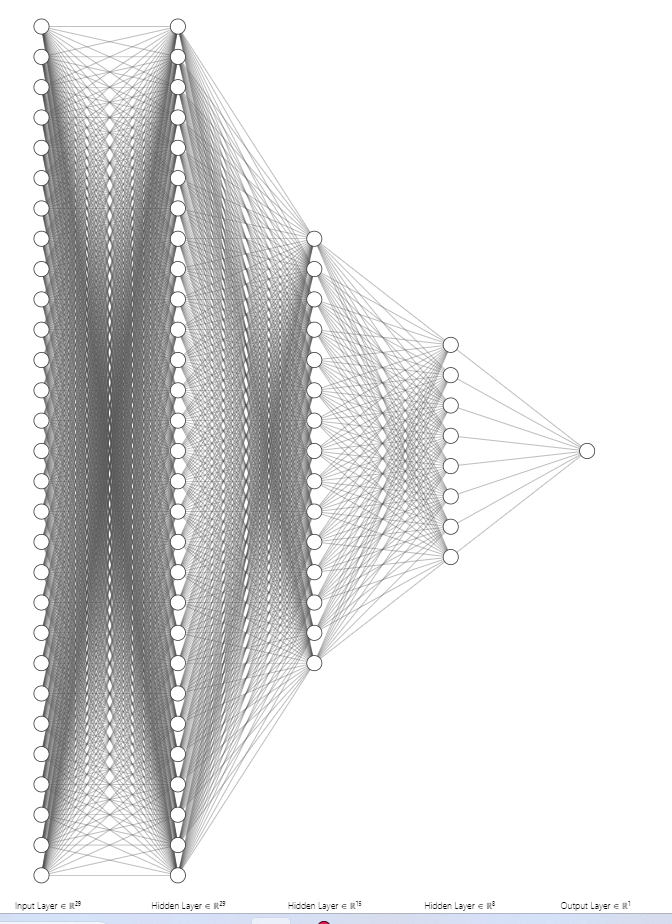

In [61]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 25)

In [62]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
130/130 [==============================] - 1s 4ms/step - loss: 423350468608.0000 - val_loss: 359038189568.0000
Epoch 2/1000
130/130 [==============================] - 0s 3ms/step - loss: 181280817152.0000 - val_loss: 106180321280.0000
Epoch 3/1000
130/130 [==============================] - 0s 3ms/step - loss: 141313146880.0000 - val_loss: 96094478336.0000
Epoch 4/1000
130/130 [==============================] - 0s 3ms/step - loss: 129243144192.0000 - val_loss: 84106878976.0000
Epoch 5/1000
130/130 [==============================] - 0s 3ms/step - loss: 118385876992.0000 - val_loss: 75549360128.0000
Epoch 6/1000
130/130 [==============================] - 0s 3ms/step - loss: 103502569472.0000 - val_loss: 62365122560.0000
Epoch 7/1000
130/130 [==============================] - 0s 3ms/step - loss: 97339760640.0000 - val_loss: 58214125568.0000
Epoch 8/1000
130/130 [==============================] - 0s 3ms/step - loss: 92145958912.0000 - val_loss: 56670109696.0000
Epoch 9/1000
130

130/130 [==============================] - 0s 3ms/step - loss: 79146704896.0000 - val_loss: 41911451648.0000
Epoch 68/1000
130/130 [==============================] - 0s 3ms/step - loss: 75364966400.0000 - val_loss: 33305786368.0000
Epoch 69/1000
130/130 [==============================] - 0s 3ms/step - loss: 76965036032.0000 - val_loss: 35744907264.0000
Epoch 70/1000
130/130 [==============================] - 0s 3ms/step - loss: 77062635520.0000 - val_loss: 37820641280.0000
Epoch 71/1000
130/130 [==============================] - 0s 3ms/step - loss: 75863801856.0000 - val_loss: 36655230976.0000
Epoch 72/1000
130/130 [==============================] - 0s 3ms/step - loss: 76199444480.0000 - val_loss: 36065005568.0000
Epoch 73/1000
130/130 [==============================] - 0s 3ms/step - loss: 75380695040.0000 - val_loss: 34930118656.0000
Epoch 74/1000
130/130 [==============================] - 0s 3ms/step - loss: 78545690624.0000 - val_loss: 34477576192.0000
Epoch 75/1000
130/130 [=======

130/130 [==============================] - 0s 3ms/step - loss: 66451951616.0000 - val_loss: 32885610496.0000
Epoch 134/1000
130/130 [==============================] - 0s 3ms/step - loss: 70823239680.0000 - val_loss: 38632263680.0000
Epoch 135/1000
130/130 [==============================] - 0s 3ms/step - loss: 69067661312.0000 - val_loss: 34336280576.0000
Epoch 136/1000
130/130 [==============================] - 0s 3ms/step - loss: 67910746112.0000 - val_loss: 36666019840.0000
Epoch 137/1000
130/130 [==============================] - 0s 3ms/step - loss: 66072592384.0000 - val_loss: 33474859008.0000
Epoch 138/1000
130/130 [==============================] - 0s 4ms/step - loss: 67800539136.0000 - val_loss: 31677521920.0000
Epoch 139/1000
130/130 [==============================] - 0s 4ms/step - loss: 68818501632.0000 - val_loss: 31664175104.0000
Epoch 140/1000
130/130 [==============================] - 0s 3ms/step - loss: 66941378560.0000 - val_loss: 37200068608.0000
Epoch 141/1000
130/130 

<Axes: >

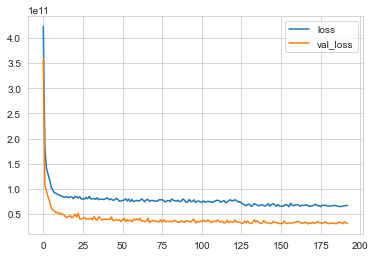

In [63]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [64]:
y_pred = model.predict(X_test)

In [65]:
eval_metric(y_test, y_pred)

r2_score: 0.7950115738077811 
mae: 99270.34660734954 
mse: 26336864197.046345 
rmse: 162286.36479090393


## Saving Final Model and Scaler

In [85]:
from sklearn.preprocessing import MinMaxScaler
import pickle

scaler = MinMaxScaler().fit(X)
pickle.dump(scaler, open("scaler_kc_house", 'wb'))

In [86]:
X_scaled = scaler.transform(X)

In [87]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

opt = Adam(lr = 0.003) # default learning rate value is 0.001
model.compile(optimizer = opt, loss = 'mse')

In [88]:
#early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 25)

In [89]:
model.fit(x=X_scaled,         
          y=y,             
          validation_split= 0.1,  
          batch_size=64,     
          epochs=1000,         
          # callbacks=[early_stop]  
         )


Epoch 1/1000
304/304 [==============================] - 1s 3ms/step - loss: 281188696064.0000 - val_loss: 102946480128.0000
Epoch 2/1000
304/304 [==============================] - 1s 2ms/step - loss: 86042550272.0000 - val_loss: 89956614144.0000
Epoch 3/1000
304/304 [==============================] - 1s 2ms/step - loss: 68904026112.0000 - val_loss: 69759049728.0000
Epoch 4/1000
304/304 [==============================] - 1s 3ms/step - loss: 54251720704.0000 - val_loss: 56304672768.0000
Epoch 5/1000
304/304 [==============================] - 1s 2ms/step - loss: 47712681984.0000 - val_loss: 52092551168.0000
Epoch 6/1000
304/304 [==============================] - 1s 2ms/step - loss: 44117540864.0000 - val_loss: 50337267712.0000
Epoch 7/1000
304/304 [==============================] - 1s 2ms/step - loss: 41108017152.0000 - val_loss: 46435270656.0000
Epoch 8/1000
304/304 [==============================] - 1s 2ms/step - loss: 38465540096.0000 - val_loss: 46194929664.0000
Epoch 9/1000
304/304 [

304/304 [==============================] - 1s 2ms/step - loss: 27291234304.0000 - val_loss: 35482058752.0000
Epoch 68/1000
304/304 [==============================] - 1s 2ms/step - loss: 27220578304.0000 - val_loss: 35956899840.0000
Epoch 69/1000
304/304 [==============================] - 1s 2ms/step - loss: 27151616000.0000 - val_loss: 37074952192.0000
Epoch 70/1000
304/304 [==============================] - 1s 2ms/step - loss: 27065145344.0000 - val_loss: 38556573696.0000
Epoch 71/1000
304/304 [==============================] - 1s 2ms/step - loss: 27080587264.0000 - val_loss: 37147516928.0000
Epoch 72/1000
304/304 [==============================] - 1s 2ms/step - loss: 27033071616.0000 - val_loss: 36730810368.0000
Epoch 73/1000
304/304 [==============================] - 1s 2ms/step - loss: 26735620096.0000 - val_loss: 37851758592.0000
Epoch 74/1000
304/304 [==============================] - 1s 2ms/step - loss: 26977345536.0000 - val_loss: 35694280704.0000
Epoch 75/1000
304/304 [=======

304/304 [==============================] - 1s 2ms/step - loss: 24289873920.0000 - val_loss: 33012267008.0000
Epoch 134/1000
304/304 [==============================] - 1s 2ms/step - loss: 24246700032.0000 - val_loss: 32851171328.0000
Epoch 135/1000
304/304 [==============================] - 1s 2ms/step - loss: 24283424768.0000 - val_loss: 33234896896.0000
Epoch 136/1000
304/304 [==============================] - 1s 2ms/step - loss: 24168685568.0000 - val_loss: 32856791040.0000
Epoch 137/1000
304/304 [==============================] - 1s 2ms/step - loss: 24214671360.0000 - val_loss: 33269301248.0000
Epoch 138/1000
304/304 [==============================] - 1s 2ms/step - loss: 24119928832.0000 - val_loss: 32939563008.0000
Epoch 139/1000
304/304 [==============================] - 1s 2ms/step - loss: 24139341824.0000 - val_loss: 32662296576.0000
Epoch 140/1000
304/304 [==============================] - 1s 2ms/step - loss: 24045537280.0000 - val_loss: 35698278400.0000
Epoch 141/1000
304/304 

304/304 [==============================] - 1s 2ms/step - loss: 22811121664.0000 - val_loss: 32791814144.0000
Epoch 200/1000
304/304 [==============================] - 1s 2ms/step - loss: 22917779456.0000 - val_loss: 32839477248.0000
Epoch 201/1000
304/304 [==============================] - 1s 2ms/step - loss: 22927915008.0000 - val_loss: 33797398528.0000
Epoch 202/1000
304/304 [==============================] - 1s 2ms/step - loss: 22883561472.0000 - val_loss: 34225590272.0000
Epoch 203/1000
304/304 [==============================] - 1s 2ms/step - loss: 22756030464.0000 - val_loss: 32918222848.0000
Epoch 204/1000
304/304 [==============================] - 1s 2ms/step - loss: 22836299776.0000 - val_loss: 33752629248.0000
Epoch 205/1000
304/304 [==============================] - 1s 2ms/step - loss: 22762397696.0000 - val_loss: 32821532672.0000
Epoch 206/1000
304/304 [==============================] - 1s 2ms/step - loss: 22703532032.0000 - val_loss: 34068633600.0000
Epoch 207/1000
304/304 

304/304 [==============================] - 1s 2ms/step - loss: 22064922624.0000 - val_loss: 33023868928.0000
Epoch 266/1000
304/304 [==============================] - 1s 2ms/step - loss: 22012592128.0000 - val_loss: 33148538880.0000
Epoch 267/1000
304/304 [==============================] - 1s 2ms/step - loss: 22023385088.0000 - val_loss: 33740441600.0000
Epoch 268/1000
304/304 [==============================] - 1s 2ms/step - loss: 22080026624.0000 - val_loss: 33657499648.0000
Epoch 269/1000
304/304 [==============================] - 1s 2ms/step - loss: 22017824768.0000 - val_loss: 33811767296.0000
Epoch 270/1000
304/304 [==============================] - 1s 2ms/step - loss: 21997137920.0000 - val_loss: 33600700416.0000
Epoch 271/1000
304/304 [==============================] - 1s 2ms/step - loss: 21998372864.0000 - val_loss: 33894531072.0000
Epoch 272/1000
304/304 [==============================] - 1s 2ms/step - loss: 22023278592.0000 - val_loss: 34391085056.0000
Epoch 273/1000
304/304 

304/304 [==============================] - 1s 2ms/step - loss: 16478653440.0000 - val_loss: 28130508800.0000
Epoch 332/1000
304/304 [==============================] - 1s 2ms/step - loss: 16406702080.0000 - val_loss: 27913408512.0000
Epoch 333/1000
304/304 [==============================] - 1s 2ms/step - loss: 16336838656.0000 - val_loss: 27925555200.0000
Epoch 334/1000
304/304 [==============================] - 1s 2ms/step - loss: 16144541696.0000 - val_loss: 27446312960.0000
Epoch 335/1000
304/304 [==============================] - 1s 2ms/step - loss: 15921588224.0000 - val_loss: 27065933824.0000
Epoch 336/1000
304/304 [==============================] - 1s 2ms/step - loss: 15862777856.0000 - val_loss: 26725611520.0000
Epoch 337/1000
304/304 [==============================] - 1s 2ms/step - loss: 15900164096.0000 - val_loss: 26164017152.0000
Epoch 338/1000
304/304 [==============================] - 1s 2ms/step - loss: 15671223296.0000 - val_loss: 27035408384.0000
Epoch 339/1000
304/304 

304/304 [==============================] - 1s 2ms/step - loss: 12045579264.0000 - val_loss: 21179803648.0000
Epoch 398/1000
304/304 [==============================] - 1s 2ms/step - loss: 12064101376.0000 - val_loss: 24940873728.0000
Epoch 399/1000
304/304 [==============================] - 1s 2ms/step - loss: 11973910528.0000 - val_loss: 21958375424.0000
Epoch 400/1000
304/304 [==============================] - 1s 2ms/step - loss: 12027848704.0000 - val_loss: 21403793408.0000
Epoch 401/1000
304/304 [==============================] - 1s 2ms/step - loss: 11929470976.0000 - val_loss: 23226548224.0000
Epoch 402/1000
304/304 [==============================] - 1s 2ms/step - loss: 11949611008.0000 - val_loss: 21073580032.0000
Epoch 403/1000
304/304 [==============================] - 1s 2ms/step - loss: 11783959552.0000 - val_loss: 22619523072.0000
Epoch 404/1000
304/304 [==============================] - 1s 2ms/step - loss: 11827128320.0000 - val_loss: 23427688448.0000
Epoch 405/1000
304/304 

304/304 [==============================] - 1s 3ms/step - loss: 10685119488.0000 - val_loss: 20404510720.0000
Epoch 464/1000
304/304 [==============================] - 1s 5ms/step - loss: 10640353280.0000 - val_loss: 20292970496.0000
Epoch 465/1000
304/304 [==============================] - 1s 2ms/step - loss: 10589036544.0000 - val_loss: 20969367552.0000
Epoch 466/1000
304/304 [==============================] - 1s 3ms/step - loss: 10417754112.0000 - val_loss: 21757964288.0000
Epoch 467/1000
304/304 [==============================] - 1s 3ms/step - loss: 10659491840.0000 - val_loss: 19198042112.0000
Epoch 468/1000
304/304 [==============================] - 1s 2ms/step - loss: 10512692224.0000 - val_loss: 21773596672.0000
Epoch 469/1000
304/304 [==============================] - 1s 2ms/step - loss: 10486817792.0000 - val_loss: 20902283264.0000
Epoch 470/1000
304/304 [==============================] - 1s 2ms/step - loss: 10390106112.0000 - val_loss: 19934472192.0000
Epoch 471/1000
304/304 

304/304 [==============================] - 1s 2ms/step - loss: 10058369024.0000 - val_loss: 21918689280.0000
Epoch 530/1000
304/304 [==============================] - 1s 2ms/step - loss: 10055328768.0000 - val_loss: 19049644032.0000
Epoch 531/1000
304/304 [==============================] - 1s 2ms/step - loss: 9984532480.0000 - val_loss: 20005265408.0000
Epoch 532/1000
304/304 [==============================] - 1s 2ms/step - loss: 9924342784.0000 - val_loss: 19793864704.0000
Epoch 533/1000
304/304 [==============================] - 1s 2ms/step - loss: 10057274368.0000 - val_loss: 20467257344.0000
Epoch 534/1000
304/304 [==============================] - 1s 2ms/step - loss: 9981187072.0000 - val_loss: 19098456064.0000
Epoch 535/1000
304/304 [==============================] - 1s 2ms/step - loss: 9978124288.0000 - val_loss: 20692869120.0000
Epoch 536/1000
304/304 [==============================] - 1s 2ms/step - loss: 9966419968.0000 - val_loss: 18688753664.0000
Epoch 537/1000
304/304 [====

304/304 [==============================] - 1s 2ms/step - loss: 9656303616.0000 - val_loss: 19245651968.0000
Epoch 596/1000
304/304 [==============================] - 1s 2ms/step - loss: 9736581120.0000 - val_loss: 19967219712.0000
Epoch 597/1000
304/304 [==============================] - 1s 2ms/step - loss: 9475020800.0000 - val_loss: 18164924416.0000
Epoch 598/1000
304/304 [==============================] - 1s 2ms/step - loss: 9667406848.0000 - val_loss: 19276892160.0000
Epoch 599/1000
304/304 [==============================] - 1s 2ms/step - loss: 9599962112.0000 - val_loss: 18274957312.0000
Epoch 600/1000
304/304 [==============================] - 1s 2ms/step - loss: 9605491712.0000 - val_loss: 19153825792.0000
Epoch 601/1000
304/304 [==============================] - 1s 2ms/step - loss: 9635665920.0000 - val_loss: 20687816704.0000
Epoch 602/1000
304/304 [==============================] - 1s 2ms/step - loss: 9654937600.0000 - val_loss: 20544507904.0000
Epoch 603/1000
304/304 [=======

Epoch 662/1000
304/304 [==============================] - 1s 2ms/step - loss: 9355754496.0000 - val_loss: 18498871296.0000
Epoch 663/1000
304/304 [==============================] - 1s 2ms/step - loss: 9257293824.0000 - val_loss: 18008315904.0000
Epoch 664/1000
304/304 [==============================] - 1s 2ms/step - loss: 9192834048.0000 - val_loss: 19976366080.0000
Epoch 665/1000
304/304 [==============================] - 1s 2ms/step - loss: 9352226816.0000 - val_loss: 20686471168.0000
Epoch 666/1000
304/304 [==============================] - 1s 2ms/step - loss: 9203174400.0000 - val_loss: 22118957056.0000
Epoch 667/1000
304/304 [==============================] - 1s 2ms/step - loss: 9328145408.0000 - val_loss: 19265404928.0000
Epoch 668/1000
304/304 [==============================] - 1s 2ms/step - loss: 9263385600.0000 - val_loss: 19716599808.0000
Epoch 669/1000
304/304 [==============================] - 1s 2ms/step - loss: 9307059200.0000 - val_loss: 19574788096.0000
Epoch 670/1000
3

304/304 [==============================] - 1s 2ms/step - loss: 9129446400.0000 - val_loss: 20939403264.0000
Epoch 729/1000
304/304 [==============================] - 1s 2ms/step - loss: 9044495360.0000 - val_loss: 20376907776.0000
Epoch 730/1000
304/304 [==============================] - 1s 2ms/step - loss: 9106334720.0000 - val_loss: 20341862400.0000
Epoch 731/1000
304/304 [==============================] - 1s 2ms/step - loss: 8962917376.0000 - val_loss: 20721788928.0000
Epoch 732/1000
304/304 [==============================] - 1s 2ms/step - loss: 8871921664.0000 - val_loss: 19549790208.0000
Epoch 733/1000
304/304 [==============================] - 1s 2ms/step - loss: 8969728000.0000 - val_loss: 18855407616.0000
Epoch 734/1000
304/304 [==============================] - 1s 3ms/step - loss: 9052508160.0000 - val_loss: 19312226304.0000
Epoch 735/1000
304/304 [==============================] - 1s 2ms/step - loss: 8935386112.0000 - val_loss: 20578914304.0000
Epoch 736/1000
304/304 [=======

304/304 [==============================] - 1s 2ms/step - loss: 8632626176.0000 - val_loss: 18472294400.0000
Epoch 795/1000
304/304 [==============================] - 1s 2ms/step - loss: 8650944512.0000 - val_loss: 19698530304.0000
Epoch 796/1000
304/304 [==============================] - 1s 2ms/step - loss: 8704052224.0000 - val_loss: 20886544384.0000
Epoch 797/1000
304/304 [==============================] - 1s 2ms/step - loss: 8831661056.0000 - val_loss: 18416289792.0000
Epoch 798/1000
304/304 [==============================] - 1s 2ms/step - loss: 8635920384.0000 - val_loss: 18442487808.0000
Epoch 799/1000
304/304 [==============================] - 1s 2ms/step - loss: 8736738304.0000 - val_loss: 18961707008.0000
Epoch 800/1000
304/304 [==============================] - 1s 2ms/step - loss: 8668293120.0000 - val_loss: 19330596864.0000
Epoch 801/1000
304/304 [==============================] - 1s 2ms/step - loss: 8647480320.0000 - val_loss: 20309704704.0000
Epoch 802/1000
304/304 [=======

Epoch 861/1000
304/304 [==============================] - 1s 2ms/step - loss: 8478112768.0000 - val_loss: 18760976384.0000
Epoch 862/1000
304/304 [==============================] - 1s 2ms/step - loss: 8578613760.0000 - val_loss: 20361558016.0000
Epoch 863/1000
304/304 [==============================] - 1s 2ms/step - loss: 8608756736.0000 - val_loss: 19437809664.0000
Epoch 864/1000
304/304 [==============================] - 1s 2ms/step - loss: 8425288704.0000 - val_loss: 18775658496.0000
Epoch 865/1000
304/304 [==============================] - 1s 2ms/step - loss: 8512590848.0000 - val_loss: 20269373440.0000
Epoch 866/1000
304/304 [==============================] - 1s 2ms/step - loss: 8512035840.0000 - val_loss: 18868639744.0000
Epoch 867/1000
304/304 [==============================] - 1s 2ms/step - loss: 8620012544.0000 - val_loss: 19277576192.0000
Epoch 868/1000
304/304 [==============================] - 1s 2ms/step - loss: 8416757248.0000 - val_loss: 20518760448.0000
Epoch 869/1000
3

304/304 [==============================] - 1s 2ms/step - loss: 8362110464.0000 - val_loss: 22554138624.0000
Epoch 928/1000
304/304 [==============================] - 1s 2ms/step - loss: 8365884928.0000 - val_loss: 20333918208.0000
Epoch 929/1000
304/304 [==============================] - 1s 2ms/step - loss: 8310298112.0000 - val_loss: 19979692032.0000
Epoch 930/1000
304/304 [==============================] - 1s 2ms/step - loss: 8307151872.0000 - val_loss: 21789990912.0000
Epoch 931/1000
304/304 [==============================] - 1s 2ms/step - loss: 8286084608.0000 - val_loss: 21768904704.0000
Epoch 932/1000
304/304 [==============================] - 1s 2ms/step - loss: 8337735168.0000 - val_loss: 20727871488.0000
Epoch 933/1000
304/304 [==============================] - 1s 2ms/step - loss: 8354838528.0000 - val_loss: 20582430720.0000
Epoch 934/1000
304/304 [==============================] - 1s 2ms/step - loss: 8287869440.0000 - val_loss: 19290359808.0000
Epoch 935/1000
304/304 [=======

Epoch 994/1000
304/304 [==============================] - 1s 2ms/step - loss: 8257054208.0000 - val_loss: 20187629568.0000
Epoch 995/1000
304/304 [==============================] - 1s 2ms/step - loss: 8139123200.0000 - val_loss: 23126761472.0000
Epoch 996/1000
304/304 [==============================] - 1s 2ms/step - loss: 8131930112.0000 - val_loss: 21557991424.0000
Epoch 997/1000
304/304 [==============================] - 1s 2ms/step - loss: 8156845056.0000 - val_loss: 23422173184.0000
Epoch 998/1000
304/304 [==============================] - 1s 2ms/step - loss: 8096798720.0000 - val_loss: 21859512320.0000
Epoch 999/1000
304/304 [==============================] - 1s 2ms/step - loss: 8113695744.0000 - val_loss: 20063238144.0000
Epoch 1000/1000
304/304 [==============================] - 1s 2ms/step - loss: 8025301504.0000 - val_loss: 21021108224.0000


<Axes: >

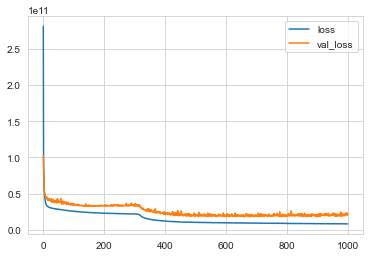

In [90]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [91]:
y_pred = model.predict(X_test)

In [92]:
eval_metric(y_test, y_pred)

r2_score: 0.9403213241088604 
mae: 59493.765577980324 
mse: 7667502071.217658 
rmse: 87564.27394330212


In [93]:
model.save('model_kc_house.h5')  # creates a D5 file 'my_model.h5'

## Loading Model and Scaler

In [94]:
from tensorflow.keras.models import load_model

In [95]:
model_kc_house = load_model('model_kc_house.h5')
scaler_kc_house = pickle.load(open("scaler_kc_house", "rb"))

## Prediction

In [96]:
single_house = df.drop('price', axis = 1).iloc[0:1, :]
single_house

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,47.511,-122.257,1340,5650,0,0,0,0,0,0,0,0,0,1,0,0


In [97]:
single_house = scaler_kc_house.transform(single_house)
single_house

array([[0.2       , 0.06666667, 0.06150342, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.08960177,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00574235, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [98]:
model_kc_house.predict(single_house)

array([[262306.94]], dtype=float32)

In [99]:
df.iloc[0][0]

221900.0

## Comparison with ML

### Linear Regression

In [100]:
from sklearn.linear_model import LinearRegression 

In [101]:
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)
y_pred = ln_model.predict(X_test)
eval_metric(y_test, y_pred)

r2_score: 0.7164380599056548 
mae: 122343.97592592593 
mse: 36431970557.756485 
rmse: 190871.6075212772


### Random Forest

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
rf_model = RandomForestRegressor(random_state = seed)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
eval_metric(y_test, y_pred)

r2_score: 0.8886293030442941 
mae: 64785.36375462963 
mse: 14308880631.643038 
rmse: 119619.73345415479


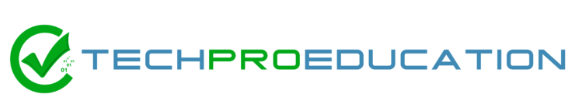